# Master Thesis - Feeder Distribution Test

<img src="simulation_v2.png" width="750">

In [74]:
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import pandas as pd
import numpy as np
import os
import time
import datetime

import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Digraph

pd.set_option('future.no_silent_downcasting', True)

## Connection to Simulation

In [75]:
client = RemoteAPIClient()

sim = client.require('sim')
simBWF = client.require('simBWF')


feeder_1 = sim.getObject('/genericFeeder[0]')
feeder_2 = sim.getObject('/genericFeeder[1]')
feeder_3 = sim.getObject('/genericFeeder[2]')



In [76]:
feeder_1_df = pd.DataFrame()
feeder_2_df = pd.DataFrame()
feeder_3_df = pd.DataFrame()

sim.setStepping(True)
sim.startSimulation()
sim.setBoolParam(sim.boolparam_display_enabled, False)

while (t := sim.getSimulationTime()) < 200  : 
    feeder_1_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(feeder_1,'customData'))])
    feeder_2_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(feeder_2,'customData'))])
    feeder_3_data = pd.DataFrame([sim.unpackTable(sim.readCustomDataBlock(feeder_3,'customData'))])
    
    feeder_1_df= pd.concat([feeder_1_df,feeder_1_data], ignore_index=True)
    feeder_2_df= pd.concat([feeder_2_df,feeder_2_data], ignore_index=True)
    feeder_3_df= pd.concat([feeder_3_df,feeder_3_data], ignore_index=True)
    sim.step()

sim.stopSimulation()

feeder_1_df = pd.DataFrame(feeder_1_df['size'].tolist(), columns=['sizeX', 'sizeY', 'sizeZ', 'insideScaling'])
feeder_2_df = pd.DataFrame(feeder_2_df['size'].tolist(), columns=['sizeX', 'sizeY', 'sizeZ', 'insideScaling'])
feeder_3_df = pd.DataFrame(feeder_3_df['size'].tolist(), columns=['sizeX', 'sizeY', 'sizeZ', 'insideScaling'])


## Plots of Camera

Text(0, 0.5, 'Frequency')

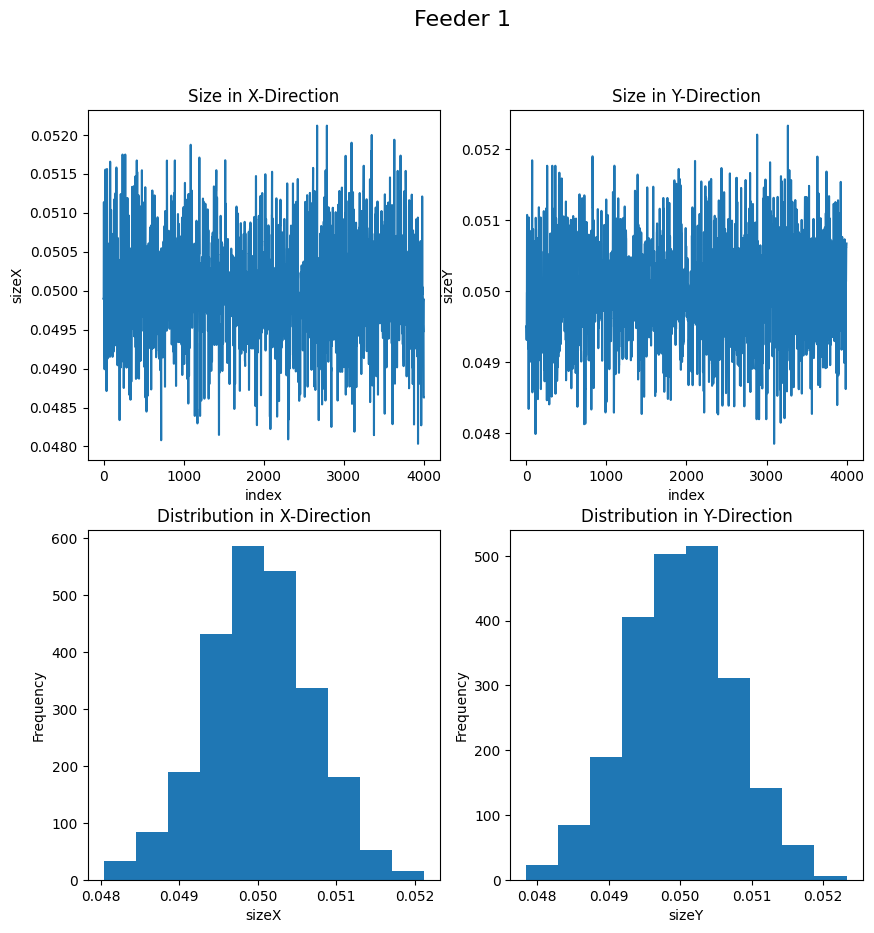

In [77]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('Feeder 1',fontsize=16)

axs[0,0].plot(feeder_1_df['sizeX'])
axs[0,1].plot(feeder_1_df['sizeY'])
axs[1,0].hist(feeder_1_df['sizeX'], density = True)
axs[1,1].hist(feeder_1_df['sizeY'], density = True)

axs[0, 0].set_title('Size in X-Direction')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_ylabel('sizeX')

axs[0, 1].set_title('Size in Y-Direction')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_ylabel('sizeY')

axs[1, 0].set_title('Distribution in X-Direction')
axs[1, 0].set_xlabel('sizeX')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].set_title('Distribution in Y-Direction')
axs[1, 1].set_xlabel('sizeY')
axs[1, 1].set_ylabel('Frequency')


Text(0, 0.5, 'Frequency')

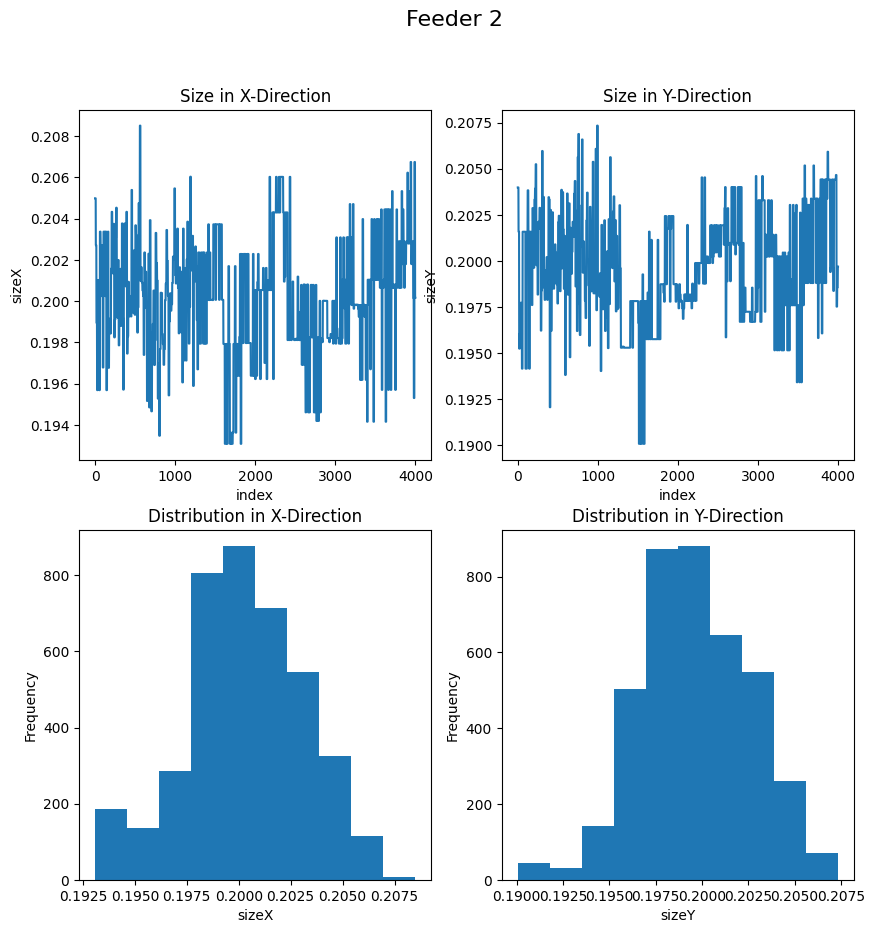

In [78]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('Feeder 2',fontsize=16)

axs[0,0].plot(feeder_2_df['sizeX'])
axs[0,1].plot(feeder_2_df['sizeY'])
axs[1,0].hist(feeder_2_df['sizeX'])
axs[1,1].hist(feeder_2_df['sizeY'])

axs[0, 0].set_title('Size in X-Direction')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_ylabel('sizeX')

axs[0, 1].set_title('Size in Y-Direction')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_ylabel('sizeY')

axs[1, 0].set_title('Distribution in X-Direction')
axs[1, 0].set_xlabel('sizeX')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].set_title('Distribution in Y-Direction')
axs[1, 1].set_xlabel('sizeY')
axs[1, 1].set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

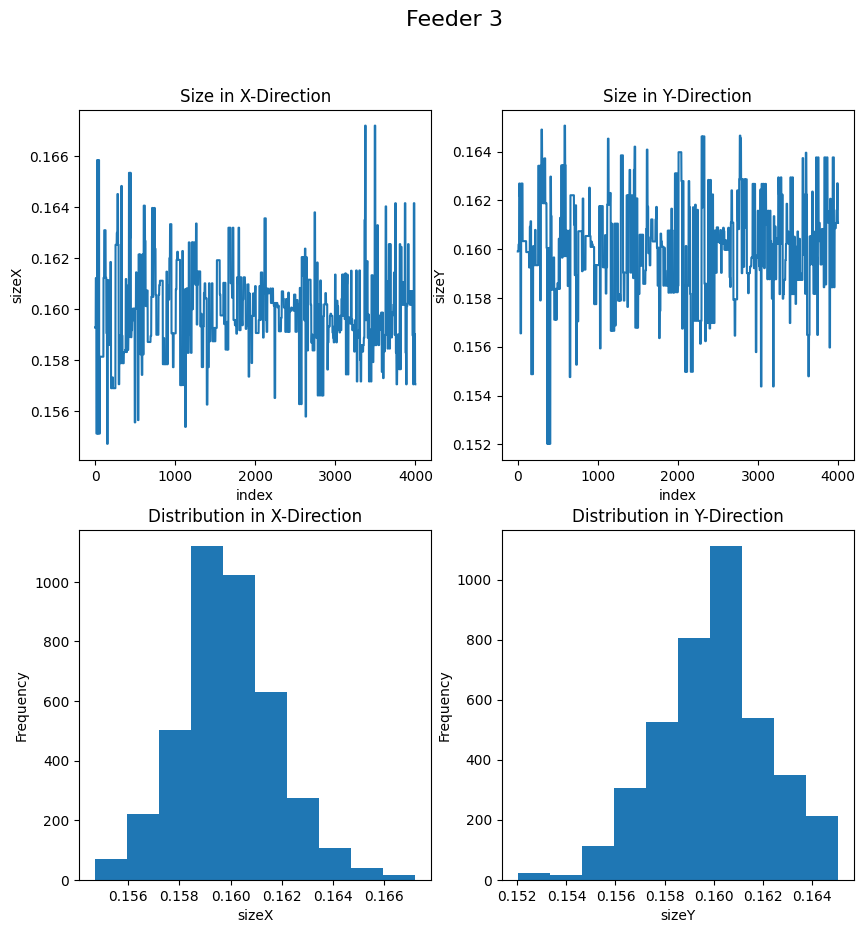

In [79]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
fig.suptitle('Feeder 3',fontsize=16)

axs[0,0].plot(feeder_3_df['sizeX'])
axs[0,1].plot(feeder_3_df['sizeY'])
axs[1,0].hist(feeder_3_df['sizeX'])
axs[1,1].hist(feeder_3_df['sizeY'])

axs[0, 0].set_title('Size in X-Direction')
axs[0, 0].set_xlabel('index')
axs[0, 0].set_ylabel('sizeX')

axs[0, 1].set_title('Size in Y-Direction')
axs[0, 1].set_xlabel('index')
axs[0, 1].set_ylabel('sizeY')

axs[1, 0].set_title('Distribution in X-Direction')
axs[1, 0].set_xlabel('sizeX')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].set_title('Distribution in Y-Direction')
axs[1, 1].set_xlabel('sizeY')
axs[1, 1].set_ylabel('Frequency')

We could argue that the part sizes do not represent an actual normal distribution. To verify the distribution we can simply plot the actual part sizes instead of the camera-captured sizes.